# TF-IDF

##### Term Frequency (TF): Number of Times a Word Appears in a Document Divided by the Total Number of Words in the document (Unique to each document) - lower = rarity
##### Inverse Data Frequency (IDF): Log of the Number of Documents Divided by the Number of Documents that contain the respective word (determines the rarity of words across ALL documents) - lower = less important
##### TF-IDF : TF X IDF - higher = rarity 

In [1]:
#import packages
import pandas as pd
import numpy as np
import math
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
#Import Corpus and Tokenized Wordlist
corpus = pd.read_csv("../data/cleaned data/corpus.csv")
token = pd.read_csv("../data/cleaned data/tokenized.csv",converters={"tokenized": literal_eval})

corpus = corpus.drop("Unnamed: 0",axis=1)
token = token.drop("Unnamed: 0",axis=1)

#make sure to have a "set" of words for each row, instead of "list"
tokenized = [list(set(li)) for li in token['tokenized']]

In [3]:
#define term frequency (tf) function
def tf(corpus, token_set):
    tf_dict = {}
    n = len(token_set)
    row_dict = corpus

    for word, count in row_dict.items():
        tf_dict[word] = count / float(n)
    
    return tf_dict

#define inverse data frequency (idf) function
def idf(documents):
    n = len(documents)
    idf_dict = dict.fromkeys(documents[0].keys(),0)

    for document in documents:
        for word, val in document.items():
            if val > 0:
                idf_dict[word] += 1
        
    for word, val in idf_dict.items():
        idf_dict[word] = math.log(n / float(val))

        #if one wants to match the sklearn version of the tfidfvectorizor
        #idf_dict[word] = math.log((n+1) / (1+float(val)))+1

    return idf_dict

#define tf-idf function
def tf_idf(tf, idf):
    tf_idf_dict = {}

    for word, val in tf.items():
        tf_idf_dict[word] = val * idf[word]

    return tf_idf_dict

#main function to execute all above
def main(corpus, tokenized):
    tf_li = []
    tf_idf_li = []
    
    documents = [corpus.iloc[i,:].to_dict() for i in range(corpus.shape[0])]

    for l, r in enumerate(documents):
        tf_temp = tf(r, tokenized[l])
        tf_li.append(tf_temp)
    
    idf_dict = idf(documents)

    for t in tf_li:
        tf_idf_temp = tf_idf(t, idf_dict)
        tf_idf_li.append(tf_idf_temp)

    return pd.DataFrame(tf_idf_li) , pd.DataFrame(tf_li) , pd.DataFrame(idf_dict, index=[0])


In [4]:
#run the main function to get the dataframes of tfidf, tf, idf
tf_idf_df, tf_df, idf_df= main(corpus, tokenized)

In [5]:
#check to see if the function worked correctly
idf_df.loc[idf_df['abandon'] >0]

,abandon,abandoned,abandoning,abandonment,abaut,abc,abd,abduct,abducted,abhorrance,...,zombified,zompire,zompires,zoning,zoom,zooming,zoso,zz,æons,èver
0,6.057954,4.186152,6.057954,6.751101,6.751101,6.057954,6.751101,6.751101,6.057954,6.751101,...,6.057954,6.751101,6.751101,6.751101,5.364807,6.751101,6.751101,6.751101,6.751101,6.751101


In [6]:
#showing top 10 tf_idf values for the 2nd dream
temp = tf_idf_df.iloc[1,:]
temp = pd.DataFrame({"values": temp.sort_values(axis = 0, ascending = False)[:15]})

words = temp.index.tolist()

temp['words'] = words

In [7]:
def barplot(tf_idf_df, dream_index, number_of_words):
    rendered_dream = pd.DataFrame({"values": tf_idf_df.iloc[dream_index,:].sort_values(axis = 0, ascending = False)[:number_of_words]})
    words = rendered_dream.index.tolist()
    rendered_dream['words'] = words

    fig = plt.figure(figsize=(8,8)) #INITIALIZE FIGURE 
    ax = fig.add_subplot()

    ax.bar(rendered_dream['words'],rendered_dream['values'])

    ax.set_title(f"Dream {dream_index} Top {number_of_words} tf-idf score words", fontsize = 20)
    ax.set_xlabel(f"Words", fontsize = 15)
    ax.set_ylabel("tf-idf", fontsize = 15)
    plt.xticks(rotation=90)

    ax.legend()

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


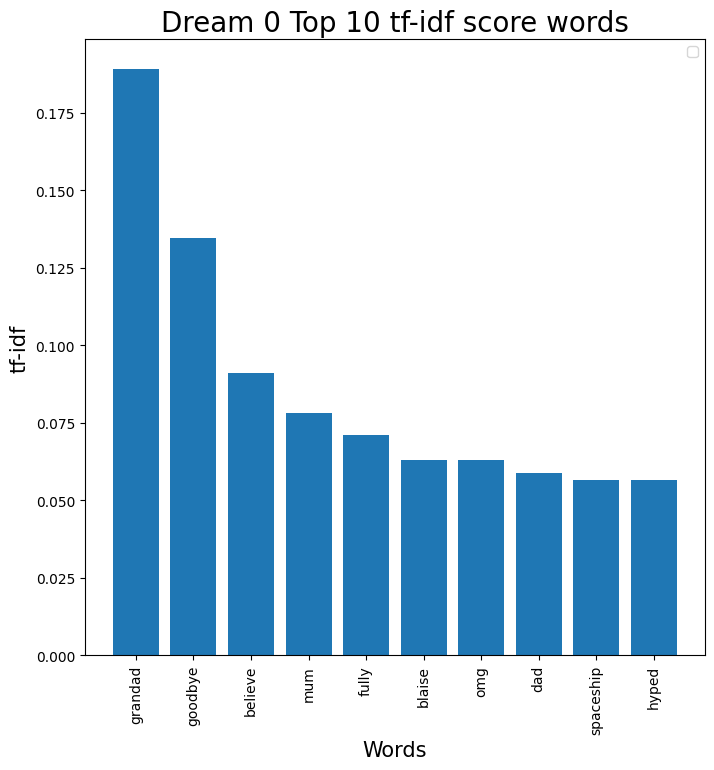

In [8]:
barplot(tf_idf_df, 0, 10)

In [9]:
def comparative_barplot(tf_idf_df, dream_index_1, dream_index_2, number_of_words):
    rendered_dream_1 = pd.DataFrame({"values": tf_idf_df.iloc[dream_index_1,:].sort_values(axis = 0, ascending = False)[:number_of_words]})
    words = rendered_dream_1.index.tolist()
    rendered_dream_1['words'] = words

    rendered_dream_2 = pd.DataFrame({"values": tf_idf_df.iloc[dream_index_2,:].sort_values(axis = 0, ascending = False)[:number_of_words]})
    words = rendered_dream_2.index.tolist()
    rendered_dream_2['words'] = words

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))

    axes[0].barh(rendered_dream_1['words'], rendered_dream_1['values'])
    axes[1].barh(rendered_dream_2['words'],rendered_dream_2['values'])
    

    axes[0].set_title(f"Dream {dream_index_1} Top {number_of_words} tf-idf score words", fontsize = 13)
    axes[0].set_xlabel(f"tf-idf", fontsize = 15)
    axes[0].set_ylabel("Words", fontsize = 15)


    axes[1].set_title(f"Dream {dream_index_2} Top {number_of_words} tf-idf score words", fontsize = 13)
    axes[1].set_xlabel(f"tf-idf", fontsize = 15)
    axes[1].set_ylabel("", fontsize = 15)
    plt.xticks(rotation=90)

    fig.tight_layout(pad=0.5)


    plt.show()

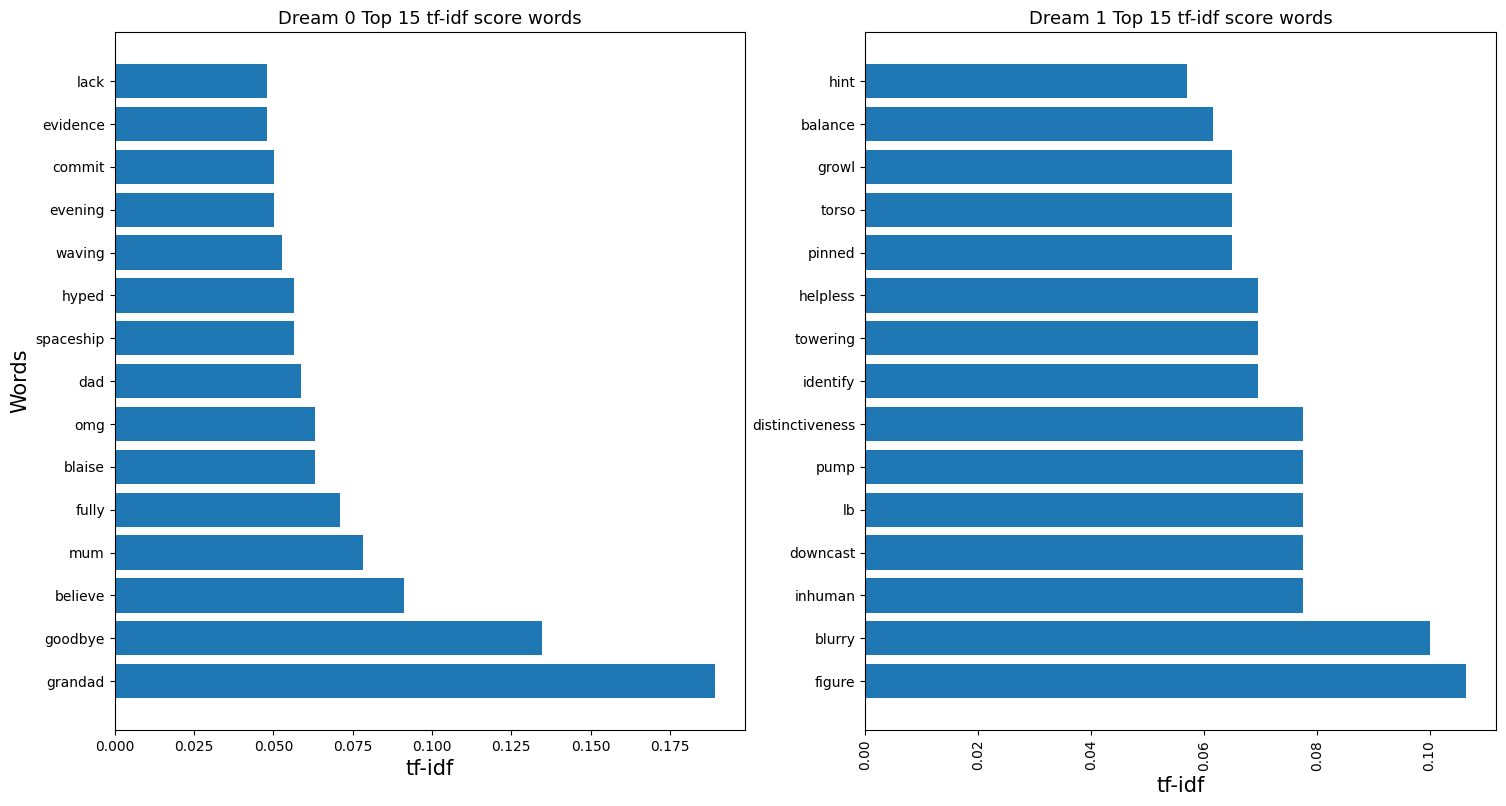

In [10]:
comparative_barplot(tf_idf_df, 0,1,15)
### upper one to vertical alignment
### remove number of words argument in title
### and top to bottom sort
### check nltk for pre-made tf-idf instead of sklearn

In [11]:
#sklearn version of tf-idf
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("../data/cleaned data/complete.csv")

In [12]:
df

,Unnamed: 0,title,complete
0,0,i think it was my grandad,dream kid age stuck whole life f think time gr...
1,1,a nondescript blurry figure standing over me,im laying bed face blurry unknown figure stand...
2,2,dream my family hated me because i am disabled,dream night ago still really shaken obviously ...
3,3,furry exhibitionists on a sidewalk,oh awful awful furry world type woman furry ne...
4,4,i had deja vu 3 times last week,context dream often always wake thinking littl...
...,...,...,...
850,850,several months ago i had reoccurring dreams ab...,amp
851,851,fudge shop dream,today dreamed large fudge shop sold many stran...
852,852,i killed a man that travelled through time,running around mansion trying set trap came st...
853,853,recurring dream,title say recurring dream slight detail change...


In [13]:
tf_idf = TfidfVectorizer(use_idf = True)
tf_idf_model = tf_idf.fit_transform(df.complete.tolist())

result = pd.DataFrame(tf_idf_model[0].T.todense(),
                      index = tf_idf.get_feature_names_out(),
                      columns = ['TF-IDF'])

result = result.sort_values('TF-IDF', ascending = False)

In [14]:
result = pd.DataFrame(tf_idf_model.toarray(), columns=tf_idf.get_feature_names_out())

In [15]:
result

,abandon,abandoned,abandoning,abandonment,abaut,abc,abd,abduct,abducted,abhorrance,...,zombified,zompire,zompires,zoning,zoom,zooming,zoso,zz,æons,èver
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


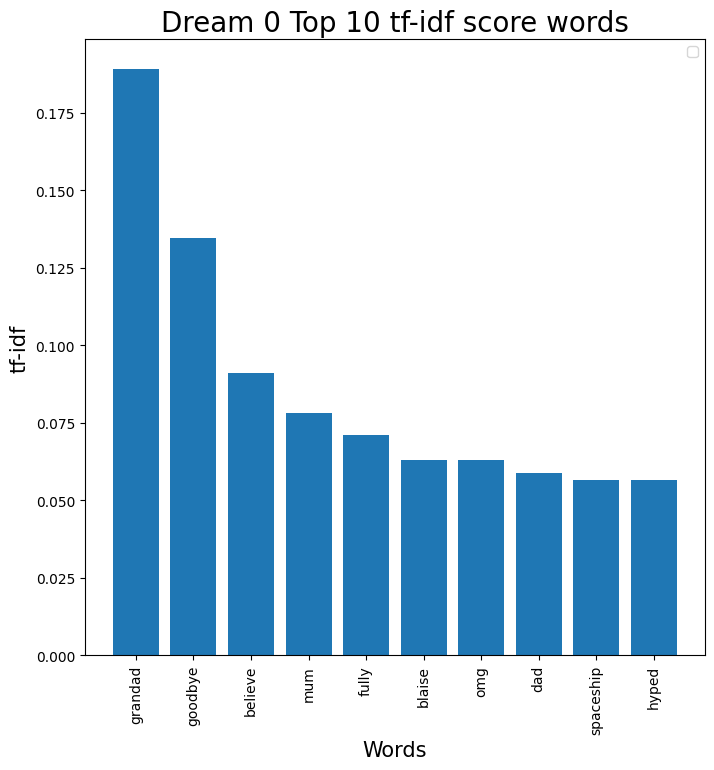

In [16]:
barplot(tf_idf_df, 0, 10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


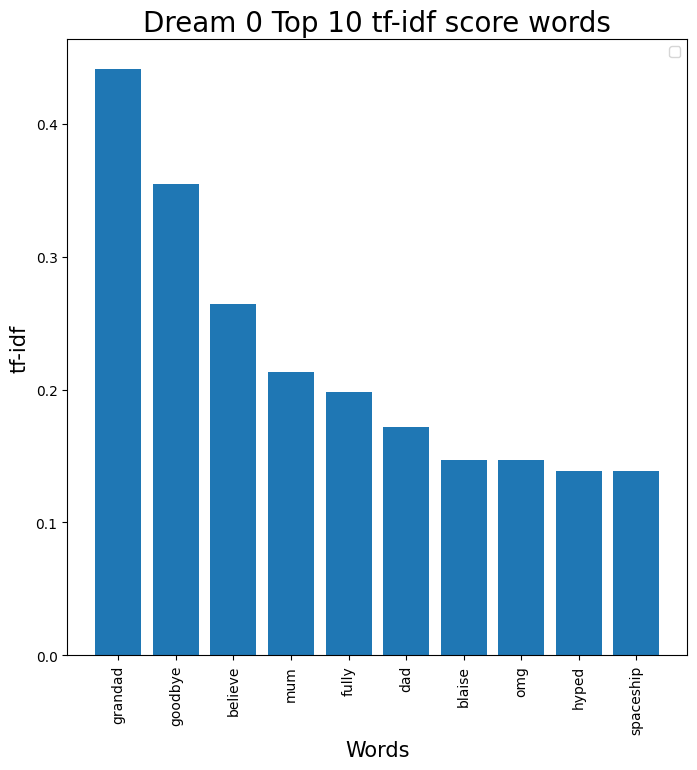

In [17]:
barplot(result, 0, 10)